# Application

I mentioned in an earlier post that one of the drivers behind my interest in learning Data Science/Machine Learning was that I had an application. While I see this application as a driver to learn and explore the data, it is the motivation rather than the outcome I am seeking. So here I want to briefly run over the application to explain what I want to achieve before beginning the journey in vain.

The application that I wish to develop is around Sports Betting and/or Trading. I don't want this blog to become a detailed description of Sports Betting. Therefore, if you wish to know more about Betting and Trading Sports then I suggest you search for some of the numerous resources available. Specifically, I am interested in predicting the outcomes of Football (that's in the British context) matches and to a lesser extent horse races. A tall order.

It will be worth explaining at this point what this journey is not about. It is not about "beating the Bookies," not about "making money," not about finding "a Holy Grail," in Sports Betting. What I hope to do is to explore the data to find patterns and to be able to predict outcomes of Football, for example, with a reasonable degree of accuracy. These predictions can then be used in further investigation. One thing I have learned in Sports Betting is that there is no such thing as a "certainty". Any individual, team or horse can have an "off" day, be affected by the conditions, be over-confident etc. etc. etc. All of which can lead to an unexpected outcome, so having a shortlist to consider on the day is the sensible way to go.

So that is the Application. Some of the data I will be using is in the public domain, other data is proprietary and cannot be shared.


My intention is to follow various techniques, i.e. Numerical Regression, Logical Regression, Decision Trees, Random Forests, Deep Learning and see where we get. There may be others that pop up on the way.

I have no idea at the moment how long the journey may be and where it will take me. Isn't that exciting.



As we now know the path we are following then let's start with a basic analysis of some of the data we will be using. In a Football Match, there are three possible outcomes (unless it is a cup game that does require a winner). What proportion of games ends up with each of the three possible outcomes? The data was downloaded from

**[FootballData.co.uk](https://www.football-data.co.uk/data.php)**  

The data is stored in csv files on my computer with 1 file per season. The first cells will load the dependencies and all csv files and append them to a single dataframe.

The data loaded is for English Premier League from 2010 to 2021.

In [1]:
# load dependencies and data
import pandas as pd
import numpy as np
import glob
from matplotlib import pyplot as plt
import seaborn as sns

#load all csv files and append to a single dataframe
path = '../../../GitHub/England-EPL' 
all_files = glob.glob(path + "/*.csv")

li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0)
    li.append(df)

footdata = pd.concat(li, axis=0, ignore_index=True)

#check that the data is loaded and see how it looks
footdata

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,AvgC<2.5,AHCh,B365CAHH,B365CAHA,PCAHH,PCAHA,MaxCAHH,MaxCAHA,AvgCAHH,AvgCAHA
0,E0,14/08/10,Aston Villa,West Ham,3.0,0.0,H,2.0,0.0,H,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,E0,14/08/10,Blackburn,Everton,1.0,0.0,H,1.0,0.0,H,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,E0,14/08/10,Bolton,Fulham,0.0,0.0,D,0.0,0.0,D,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,E0,14/08/10,Chelsea,West Brom,6.0,0.0,H,2.0,0.0,H,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,E0,14/08/10,Sunderland,Birmingham,2.0,2.0,D,1.0,0.0,H,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4418,E0,23/05/2021,Liverpool,Crystal Palace,2.0,0.0,H,1.0,0.0,H,...,3.49,-2.25,1.86,2.04,1.88,2.03,1.98,2.14,1.88,2.00
4419,E0,23/05/2021,Man City,Everton,5.0,0.0,H,2.0,0.0,H,...,2.77,-1.75,2.01,1.89,1.99,1.89,2.20,2.00,2.03,1.85
4420,E0,23/05/2021,Sheffield United,Burnley,1.0,0.0,H,1.0,0.0,H,...,2.05,0.00,2.04,1.86,2.05,1.86,2.17,1.90,2.03,1.84
4421,E0,23/05/2021,West Ham,Southampton,3.0,0.0,H,2.0,0.0,H,...,2.14,-0.75,2.00,1.90,2.02,1.91,2.06,2.01,1.99,1.89


The data we require is already processed and presented in the FTR column. All we need to do is to count the occurrences and then plot a graph.


In [2]:
#count the occurances of each outcome as a percentage of all games
game_counts = footdata["FTR"].value_counts()

game_counts


H    1967
A    1359
D    1096
Name: FTR, dtype: int64

That gives us the numbers of games that ended as H - Home win, A - Away win, and D Draw in the English Premier League between 2010 and 2021.

Now to plot the bar chart. To make it more meaningful first, extract the number of games as a percentage then plot the graph.

H    44.5%
A    30.7%
D    24.8%
Name: FTR, dtype: object

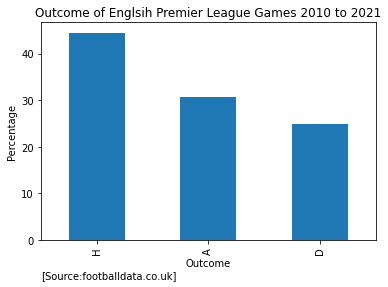

In [26]:
#plot the data in a bar chart after converting to percentage

gamedata = footdata.FTR

percent = gamedata.value_counts(normalize=True).mul(100).round(1).astype(str) + '%'

gamedata.value_counts(normalize=True).mul(100).round(1).sort_values(ascending=False).plot(kind = 'bar')
plt.title('Outcome of Englsih Premier League Games 2010 to 2021')
plt.ylabel('Percentage')
plt.xlabel('Outcome')
plt.annotate('[Source:footballdata.co.uk]', (0,0), (0,-30), fontsize=10, 
             xycoords='axes fraction', textcoords='offset points', va='top')
percent

So there is a start. We now know that around 75% of games end with a result while just under 25% end in a draw. Armed with that information, then we can make informed decisions. While that information may be useful, in itself is not sufficient to begin to construct a profitable strategy or predict outcomes to any degree of certainty. We need to delve deeper.

And so the journey begins, next step . . .